In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
census = pd.read_csv("census-income .csv")
census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
census.drop('education-num',axis=1,inplace=True)

In [4]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  annual_income   32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [5]:
census.duplicated().sum()

24

In [6]:
census.drop_duplicates(inplace=True)

In [7]:
census.duplicated().sum()

0

In [8]:
pearson_corr_matrix = census.corr(method='spearman')
print("Pearson Correlation Matrix:")
print(pearson_corr_matrix)

Pearson Correlation Matrix:
                     age    fnlwgt  capital-gain  capital-loss  hours-per-week
age             1.000000 -0.077917      0.124905      0.058433        0.142763
fnlwgt         -0.077917  1.000000     -0.006032     -0.006910       -0.021882
capital-gain    0.124905 -0.006032      1.000000     -0.066622        0.093316
capital-loss    0.058433 -0.006910     -0.066622      1.000000        0.059842
hours-per-week  0.142763 -0.021882      0.093316      0.059842        1.000000


C:\Users\asus\AppData\Local\Temp\ipykernel_8320\691932112.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pearson_corr_matrix = census.corr(method='spearman')


In [9]:
census.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000


In [10]:
census.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,annual_income
count,32537,32537,32537,32537,32537,32537,32537,32537,32537
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22673,10494,14970,4136,13187,27795,21775,29153,24698


In [11]:
census["annual_income"].value_counts()

<=50K    24698
>50K      7839
Name: annual_income, dtype: int64

In [12]:
census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   marital-status  32537 non-null  object
 5   occupation      32537 non-null  object
 6   relationship    32537 non-null  object
 7   race            32537 non-null  object
 8   sex             32537 non-null  object
 9   capital-gain    32537 non-null  int64 
 10  capital-loss    32537 non-null  int64 
 11  hours-per-week  32537 non-null  int64 
 12  native-country  32537 non-null  object
 13  annual_income   32537 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.7+ MB


In [13]:
workclass = pd.get_dummies(census['workclass'],drop_first=True)
education = pd.get_dummies(census['education'],drop_first=True)
marital_status = pd.get_dummies(census['marital-status'],drop_first=True)
occupation = pd.get_dummies(census['occupation'],drop_first=True)
relationship = pd.get_dummies(census['relationship'],drop_first=True)
race = pd.get_dummies(census['race'],drop_first=True)
sex = pd.get_dummies(census['sex'],drop_first=True)
native_country = pd.get_dummies(census['native-country'],drop_first=True)

In [14]:
census['annual_income'] = np.where(census['annual_income'] == '>50K',1,0)
# annual_income = pd.DataFrame(annual_income)

In [15]:
census.tail()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0
32560,52,Self-emp-inc,287927,HS-grad,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,1


In [16]:
census.drop(['workclass', 'education','marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'],axis=1,inplace=True)

In [17]:
census = pd.concat([census,workclass,education,marital_status,occupation,relationship, race,sex,native_country],axis=1)

In [18]:
census.head()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,annual_income,Federal-gov,Local-gov,Never-worked,Private,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,39,77516,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [19]:
census.columns

Index(['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week',
       'annual_income', 'Federal-gov', 'Local-gov', 'Never-worked', 'Private',
       'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay', '11th',
       '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm',
       'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad', 'Masters',
       'Preschool', 'Prof-school', 'Some-college', 'Married-AF-spouse',
       'Married-civ-spouse', 'Married-spouse-absent', 'Never-married',
       'Separated', 'Widowed', 'Adm-clerical', 'Armed-Forces', 'Craft-repair',
       'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners',
       'Machine-op-inspct', 'Other-service', 'Priv-house-serv',
       'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support',
       'Transport-moving', 'Not-in-family', 'Other-relative', 'Own-child',
       'Unmarried', 'Wife', 'Asian-Pac-Islander', 'Black', 'Other', 'White',
       'Male', 'Cambodia', 'Canada', 'China', 'Columbia', 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(census.drop('annual_income',axis=1),census['annual_income'], test_size=0.20, random_state=42)

In [21]:
X_train

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
32239,36,127573,0,0,38,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
30377,52,114228,3325,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5457,34,209808,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
19700,54,183248,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
23197,30,83253,0,0,55,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29823,38,187983,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5392,63,216413,0,0,25,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
860,18,216284,0,0,20,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
15801,34,242960,0,0,50,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [22]:
y_train

32239    0
30377    0
5457     1
19700    0
23197    0
        ..
29823    0
5392     0
860      0
15801    0
23669    0
Name: annual_income, Length: 26029, dtype: int32

In [23]:
X_test

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
3643,31,33308,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16042,24,130534,0,0,40,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9404,60,98350,0,0,60,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17910,31,398988,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5200,43,144778,0,0,40,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8215,22,157332,0,0,35,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
24638,49,187454,99999,0,65,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5516,43,183479,0,0,30,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
29831,32,112650,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [24]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
X_train

array([[0.26027397, 0.07829831, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.47945205, 0.069235  , 0.03325033, ..., 1.        , 0.        ,
        0.        ],
       [0.23287671, 0.13414854, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.01369863, 0.13854675, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.23287671, 0.15666386, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.08219178, 0.21572649, 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [26]:
X_test

array([[0.19178082, 0.01427786, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.09589041, 0.08030929, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.5890411 , 0.05845139, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.35616438, 0.1162671 , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.20547945, 0.0681633 , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.39726027, 0.01460792, 0.03103031, ..., 1.        , 0.        ,
        0.        ]])

In [27]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression accuracy score is: \n",accuracy_score(y_test,y_pred_logreg))
print("Logistic Regression confusion matric is: \n",confusion_matrix(y_test,y_pred_logreg))
print("Logistic Regression classification report is\n: ",classification_report(y_test,y_pred_logreg))

Logistic Regression accuracy score is: 
 0.8529502151198525
Logistic Regression confusion matric is: 
 [[4563  342]
 [ 615  988]]
Logistic Regression classification report is
:                precision    recall  f1-score   support

           0       0.88      0.93      0.91      4905
           1       0.74      0.62      0.67      1603

    accuracy                           0.85      6508
   macro avg       0.81      0.77      0.79      6508
weighted avg       0.85      0.85      0.85      6508



C:\Users\asus\anaconda3\envs\Intellipython\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
print("KNN accuracy score is: \n",accuracy_score(y_test,y_pred_knn))
print("KNN confusion matric is: \n",confusion_matrix(y_test,y_pred_knn))
print("KNN classification report is\n: ",classification_report(y_test,y_pred_knn))

KNN accuracy score is: 
 0.8234480639213276
KNN confusion matric is: 
 [[4608  297]
 [ 852  751]]
KNN classification report is
:                precision    recall  f1-score   support

           0       0.84      0.94      0.89      4905
           1       0.72      0.47      0.57      1603

    accuracy                           0.82      6508
   macro avg       0.78      0.70      0.73      6508
weighted avg       0.81      0.82      0.81      6508



In [29]:
svc = SVC()
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)
print("SVC accuracy score is: \n",accuracy_score(y_test,y_pred_svc))
print("SVC confusion matric is: \n",confusion_matrix(y_test,y_pred_svc))
print("SVC classification report is\n: ",classification_report(y_test,y_pred_svc))

SVC accuracy score is: 
 0.8368162261831592
SVC confusion matric is: 
 [[4552  353]
 [ 709  894]]
SVC classification report is
:                precision    recall  f1-score   support

           0       0.87      0.93      0.90      4905
           1       0.72      0.56      0.63      1603

    accuracy                           0.84      6508
   macro avg       0.79      0.74      0.76      6508
weighted avg       0.83      0.84      0.83      6508



In [30]:
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)
print("GaussianNB accuracy score is: \n",accuracy_score(y_test,y_pred_nb))
print("GaussianNB confusion matric is: \n",confusion_matrix(y_test,y_pred_nb))
print("GaussianNB classification report is\n: ",classification_report(y_test,y_pred_nb))

GaussianNB accuracy score is: 
 0.5084511370620775
GaussianNB confusion matric is: 
 [[1765 3140]
 [  59 1544]]
GaussianNB classification report is
:                precision    recall  f1-score   support

           0       0.97      0.36      0.52      4905
           1       0.33      0.96      0.49      1603

    accuracy                           0.51      6508
   macro avg       0.65      0.66      0.51      6508
weighted avg       0.81      0.51      0.52      6508



In [31]:
tree = DecisionTreeClassifier(criterion='entropy',max_depth=10,random_state=42)
tree.fit(X_train,y_train)
y_pred_tree = tree.predict(X_test)
print("Decision Tree Classifier accuracy score is: \n",accuracy_score(y_test,y_pred_tree))
print("Decision Tree Classifier confusion matric is: \n",confusion_matrix(y_test,y_pred_tree))
print("Decision Tree Classifier classification report is\n: ",classification_report(y_test,y_pred_tree))

Decision Tree Classifier accuracy score is: 
 0.8592501536570375
Decision Tree Classifier confusion matric is: 
 [[4640  265]
 [ 651  952]]
Decision Tree Classifier classification report is
:                precision    recall  f1-score   support

           0       0.88      0.95      0.91      4905
           1       0.78      0.59      0.68      1603

    accuracy                           0.86      6508
   macro avg       0.83      0.77      0.79      6508
weighted avg       0.85      0.86      0.85      6508



In [32]:
rf = RandomForestClassifier(n_estimators=200,criterion='entropy',max_depth=10,random_state=42)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Classifier accuracy score is: \n",accuracy_score(y_test,y_pred_rf))
print("Random Forest Classifier confusion matric is: \n",confusion_matrix(y_test,y_pred_rf))
print("Random Forest Classifier classification report is\n: ",classification_report(y_test,y_pred_rf))

Random Forest Classifier accuracy score is: 
 0.8587891825445605
Random Forest Classifier confusion matric is: 
 [[4762  143]
 [ 776  827]]
Random Forest Classifier classification report is
:                precision    recall  f1-score   support

           0       0.86      0.97      0.91      4905
           1       0.85      0.52      0.64      1603

    accuracy                           0.86      6508
   macro avg       0.86      0.74      0.78      6508
weighted avg       0.86      0.86      0.85      6508



In [35]:
error_rate =[]
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    

Text(0, 0.5, 'Error Rate')

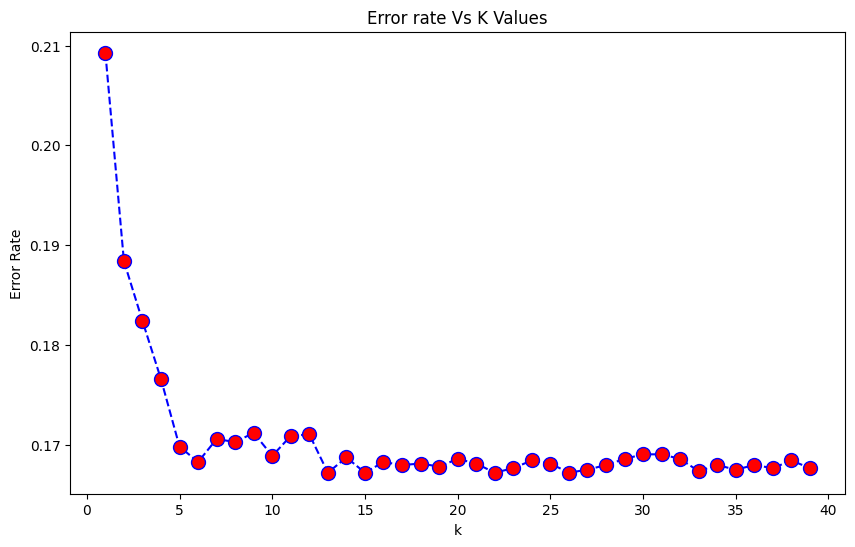

In [40]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',ls='--',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error rate Vs K Values')
plt.xlabel("k")
plt.ylabel('Error Rate')

In [41]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
print("KNN accuracy score is: \n",accuracy_score(y_test,y_pred_knn))
print("KNN confusion matric is: \n",confusion_matrix(y_test,y_pred_knn))
print("KNN classification report is\n: ",classification_report(y_test,y_pred_knn))

KNN accuracy score is: 
 0.832821143208359
KNN confusion matric is: 
 [[4512  393]
 [ 695  908]]
KNN classification report is
:                precision    recall  f1-score   support

           0       0.87      0.92      0.89      4905
           1       0.70      0.57      0.63      1603

    accuracy                           0.83      6508
   macro avg       0.78      0.74      0.76      6508
weighted avg       0.82      0.83      0.83      6508



In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
param_grid = {'C': [0.1,1,10,100], 'gamma': [1,0.1,0.01,0.001]}

In [45]:
grid = GridSearchCV(SVC(),param_grid,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time= 2.1min
[CV] END .....................................C=0.1, gamma=1; total time= 1.3min
[CV] END .....................................C=0.1, gamma=1; total time= 1.1min
[CV] END .....................................C=0.1, gamma=1; total time= 1.3min
[CV] END .....................................C=0.1, gamma=1; total time= 1.1min
[CV] END ...................................C=0.1, gamma=0.1; total time=  27.8s
[CV] END ...................................C=0.1, gamma=0.1; total time=  31.2s
[CV] END ...................................C=0.1, gamma=0.1; total time=  33.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=  32.8s
[CV] END ...................................C=0.1, gamma=0.1; total time=  29.2s
[CV] END ..................................C=0.1, gamma=0.01; total time=  31.9s
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [46]:
grid_predictions = grid.predict(X_test)

In [47]:
print(confusion_matrix(y_test,grid_predictions))

[[4587  318]
 [ 650  953]]


In [48]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.88      0.94      0.90      4905
           1       0.75      0.59      0.66      1603

    accuracy                           0.85      6508
   macro avg       0.81      0.76      0.78      6508
weighted avg       0.84      0.85      0.85      6508

